In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
table = pd.read_csv("air_cargo_supplychain.csv", encoding="ISO-8859-1") 
table.head()

,Shipment ID,Origin Airport,Destination Airport,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Mode of Transport,Carrier Name,Transit Time (hours),Temperature-Sensitive,Perishable Goods,Customs Clearance Time (hours),Weather Conditions,Day of Week,Delay Status
0,SHIP000001,SFO,LHR,655.03,7.80,1238.23,Air,UPS,16,No,Yes,7,Clear,Thursday,Delayed
1,SHIP000002,ATL,SIN,988.60,37.41,1868.80,Air,Lufthansa Cargo,21,No,No,5,Clear,Thursday,On-Time
2,SHIP000003,DFW,HKG,637.71,10.53,1205.49,Air,FedEx,6,No,No,36,Clear,Wednesday,On-Time
3,SHIP000004,SFO,DXB,367.47,7.70,694.65,Rail,DHL,17,Yes,No,16,Rainy,Sunday,On-Time
4,SHIP000005,ORD,HKG,671.23,3.59,1268.86,Air,DHL,36,No,No,3,Rainy,Friday,Delayed


In [3]:
table.dtypes

Shipment ID                        object
Origin Airport                     object
Destination Airport                object
Shipment Weight (kg)              float64
Shipment Volume (m³)              float64
Freight Cost (USD)                float64
Mode of Transport                  object
Carrier Name                       object
Transit Time (hours)                int64
Temperature-Sensitive              object
Perishable Goods                   object
Customs Clearance Time (hours)      int64
Weather Conditions                 object
Day of Week                        object
Delay Status                       object
dtype: object

In [4]:
table.columns

Index(['Shipment ID', 'Origin Airport', 'Destination Airport',
       'Shipment Weight (kg)', 'Shipment Volume (m³)', 'Freight Cost (USD)',
       'Mode of Transport', 'Carrier Name', 'Transit Time (hours)',
       'Temperature-Sensitive', 'Perishable Goods',
       'Customs Clearance Time (hours)', 'Weather Conditions', 'Day of Week',
       'Delay Status'],
      dtype='object')

In [5]:
table.describe()

,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Transit Time (hours),Customs Clearance Time (hours)
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,505.966453,25.260027,956.452718,37.960850,24.121350
std,286.057561,14.388848,540.748364,19.416461,13.556833
min,10.020000,0.100000,18.940000,5.000000,1.000000
25%,261.167500,12.857500,493.697500,21.000000,12.000000
50%,505.990000,25.270000,956.495000,38.000000,24.000000
75%,754.390000,37.830000,1426.057500,55.000000,36.000000
max,999.970000,49.990000,1890.290000,71.000000,47.000000


In [6]:
table.isnull().sum()

Shipment ID                       0
Origin Airport                    0
Destination Airport               0
Shipment Weight (kg)              0
Shipment Volume (m³)              0
Freight Cost (USD)                0
Mode of Transport                 0
Carrier Name                      0
Transit Time (hours)              0
Temperature-Sensitive             0
Perishable Goods                  0
Customs Clearance Time (hours)    0
Weather Conditions                0
Day of Week                       0
Delay Status                      0
dtype: int64

In [7]:
# Crosstab: Relationship between two categorical variables
crosstab_result = pd.crosstab(table["Origin Airport"], table["Destination Airport"], values=table["Shipment Weight (kg)"], aggfunc='sum')
print("\nCrosstab of Shipment Weight between Origin and Destination:")
print(crosstab_result)


Crosstab of Shipment Weight between Origin and Destination:
Destination Airport        CDG        DXB        HKG        LHR        NRT  \
Origin Airport                                                               
ATL                  207245.83  193171.01  225980.69  209768.67  200618.52   
DFW                  210006.04  187416.43  190413.44  194171.32  220453.16   
JFK                  209480.12  224200.99  222492.56  194433.86  226555.65   
LAX                  198306.52  193762.86  207938.26  225948.68  213796.41   
MIA                  208377.80  192136.54  223987.15  198828.11  218000.99   
ORD                  192177.11  194812.54  198269.64  210956.41  220548.66   
SFO                  204541.41  205476.06  202494.29  191689.30  230834.12   

Destination Airport        SIN        SYD  
Origin Airport                             
ATL                  210464.65  216253.47  
DFW                  243245.94  205974.64  
JFK                  216433.38  175224.71  
LAX             

In [8]:
# Crosstab for categorical othercolumns vs Delay Status
categorical_features = ['Mode of Transport', 'Carrier Name', 'Temperature-Sensitive',
                        'Perishable Goods', 'Weather Conditions', 'Day of Week','Origin Airport',
                      'Destination Airport' ]

for othercolumn in categorical_features:
    tab = pd.crosstab(table[othercolumn], table['Delay Status'])
    print(f"\nCrosstab for {othercolumn} vs Delay Status:\n", tab)


Crosstab for Mode of Transport vs Delay Status:
 Delay Status       Delayed  On-Time
Mode of Transport                  
Air                   6983     7002
Rail                  1433     1532
Truck                 1519     1531

Crosstab for Carrier Name vs Delay Status:
 Delay Status     Delayed  On-Time
Carrier Name                     
DHL                 1996     1974
Emirates Cargo      2018     2018
FedEx               1972     2003
Lufthansa Cargo     2017     2075
UPS                 1932     1995

Crosstab for Temperature-Sensitive vs Delay Status:
 Delay Status           Delayed  On-Time
Temperature-Sensitive                  
No                        6916     7079
Yes                       3019     2986

Crosstab for Perishable Goods vs Delay Status:
 Delay Status      Delayed  On-Time
Perishable Goods                  
No                   7985     8050
Yes                  1950     2015

Crosstab for Weather Conditions vs Delay Status:
 Delay Status        Delayed  On-T

In [9]:
# Groupby operations: Aggregating data
grouped_data = table.groupby("Carrier Name")["Shipment Weight (kg)"].sum()
print("Total Shipment Weight by Airline:")
print(grouped_data)

Total Shipment Weight by Airline:
Carrier Name
DHL                2003026.56
Emirates Cargo     2054753.63
FedEx              2014045.89
Lufthansa Cargo    2068140.78
UPS                1979362.19
Name: Shipment Weight (kg), dtype: float64


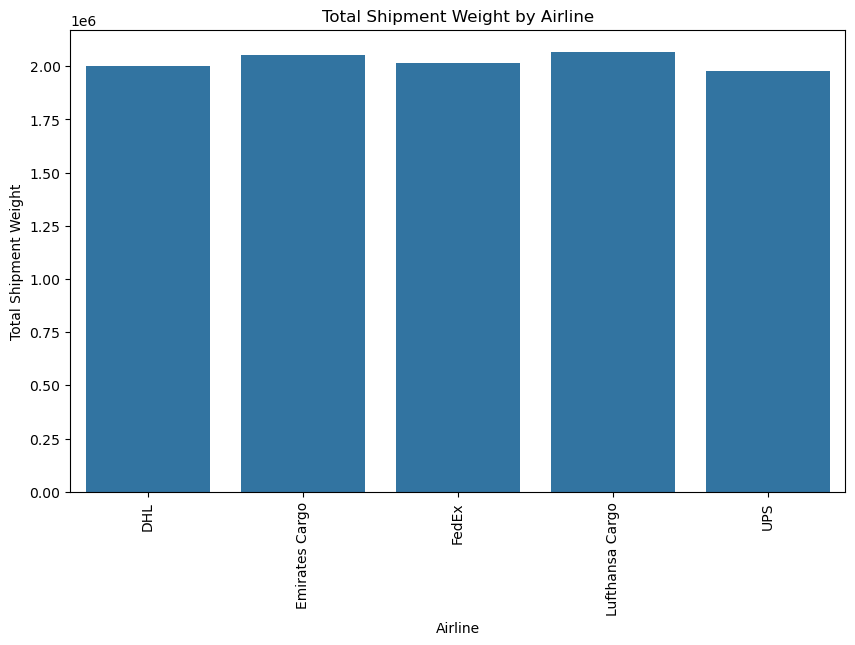

In [10]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values)
plt.xticks(rotation=90)
plt.xlabel("Airline")
plt.ylabel("Total Shipment Weight")
plt.title("Total Shipment Weight by Airline")
plt.show()

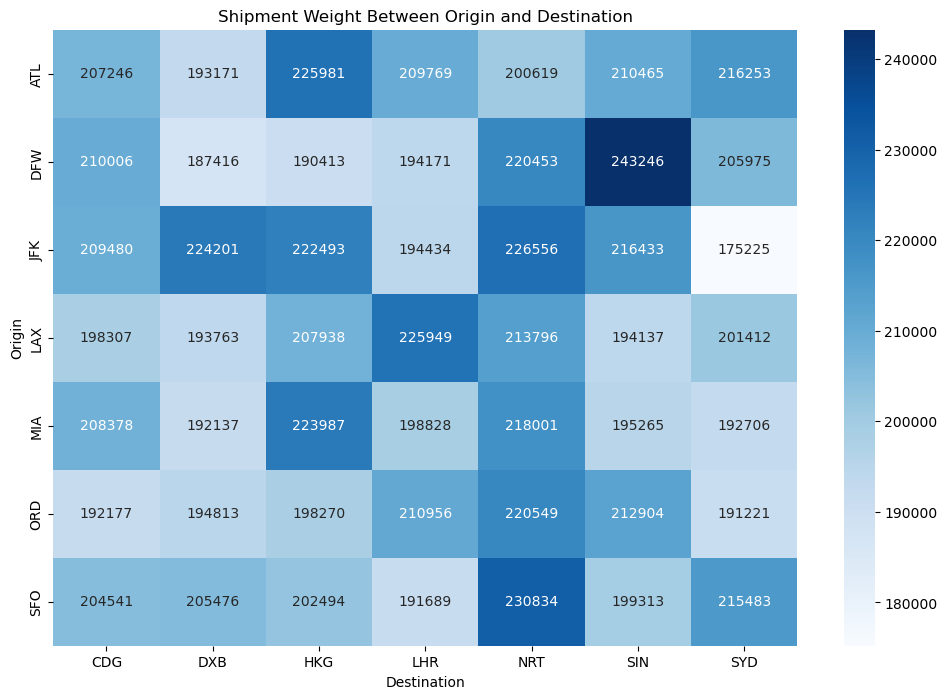

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab_result, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel("Destination")
plt.ylabel("Origin")
plt.title("Shipment Weight Between Origin and Destination")
plt.show()

C:\Users\Akshaya\AppData\Local\Temp\ipykernel_11920\1830269966.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Delay Status", data=table, palette="viridis", edgecolor="black", linewidth=1.5)


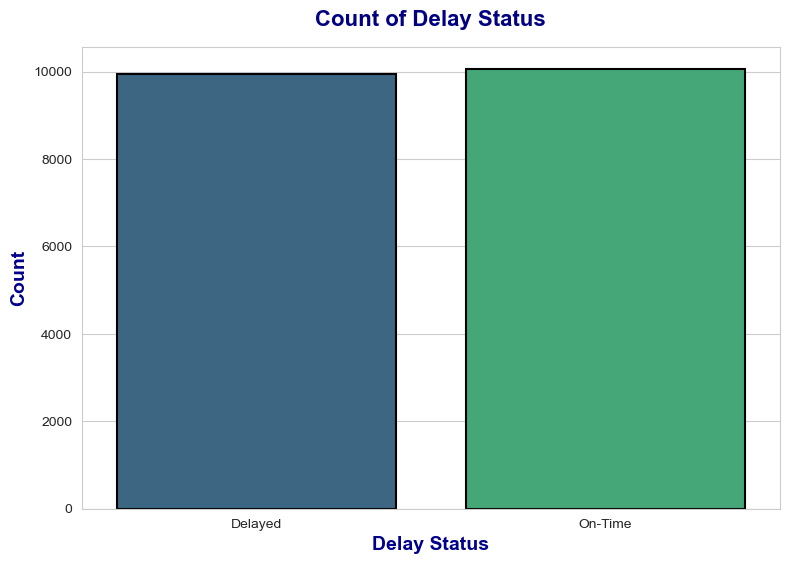

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set Seaborn style
sns.set_style("whitegrid")
# Create the count plot with a Seaborn palette
plt.figure(figsize=(9, 6), dpi=100)
sns.countplot(x="Delay Status", data=table, palette="viridis", edgecolor="black", linewidth=1.5)
# Title and labels
plt.title("Count of Delay Status", fontsize=16, fontweight='bold', color='navy', pad=15)
plt.xlabel("Delay Status", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Count", fontsize=14, fontweight='bold', color='darkblue')
# Show plot
plt.show()


In [13]:
table.dtypes

Shipment ID                        object
Origin Airport                     object
Destination Airport                object
Shipment Weight (kg)              float64
Shipment Volume (m³)              float64
Freight Cost (USD)                float64
Mode of Transport                  object
Carrier Name                       object
Transit Time (hours)                int64
Temperature-Sensitive              object
Perishable Goods                   object
Customs Clearance Time (hours)      int64
Weather Conditions                 object
Day of Week                        object
Delay Status                       object
dtype: object

In [14]:
table.nunique()

Shipment ID                       20000
Origin Airport                        7
Destination Airport                   7
Shipment Weight (kg)              18158
Shipment Volume (m³)               4898
Freight Cost (USD)                18158
Mode of Transport                     3
Carrier Name                          5
Transit Time (hours)                 67
Temperature-Sensitive                 2
Perishable Goods                      2
Customs Clearance Time (hours)       47
Weather Conditions                    4
Day of Week                           7
Delay Status                          2
dtype: int64

In [15]:
table.drop(columns=["Shipment ID"],inplace=True)
table

,Origin Airport,Destination Airport,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Mode of Transport,Carrier Name,Transit Time (hours),Temperature-Sensitive,Perishable Goods,Customs Clearance Time (hours),Weather Conditions,Day of Week,Delay Status
0,SFO,LHR,655.03,7.80,1238.23,Air,UPS,16,No,Yes,7,Clear,Thursday,Delayed
1,ATL,SIN,988.60,37.41,1868.80,Air,Lufthansa Cargo,21,No,No,5,Clear,Thursday,On-Time
2,DFW,HKG,637.71,10.53,1205.49,Air,FedEx,6,No,No,36,Clear,Wednesday,On-Time
3,SFO,DXB,367.47,7.70,694.65,Rail,DHL,17,Yes,No,16,Rainy,Sunday,On-Time
4,ORD,HKG,671.23,3.59,1268.86,Air,DHL,36,No,No,3,Rainy,Friday,Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,ATL,DXB,158.99,10.97,300.55,Air,UPS,36,Yes,Yes,32,Clear,Monday,Delayed
19996,MIA,NRT,655.74,42.92,1239.58,Air,FedEx,46,Yes,No,28,Foggy,Friday,On-Time
19997,LAX,LHR,711.80,29.54,1345.55,Air,UPS,30,Yes,No,16,Clear,Monday,On-Time
19998,DFW,HKG,147.04,4.38,277.96,Rail,FedEx,16,No,No,19,Clear,Thursday,On-Time


In [16]:
OA=pd.get_dummies(table["Origin Airport"],drop_first=True)

In [17]:
OA=OA.astype(int)
OA

,DFW,JFK,LAX,MIA,ORD,SFO
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,1,0
...,...,...,...,...,...,...
19995,0,0,0,0,0,0
19996,0,0,0,1,0,0
19997,0,0,1,0,0,0
19998,1,0,0,0,0,0


In [18]:
DA=pd.get_dummies(table["Destination Airport"],drop_first=True)
DA

,DXB,HKG,LHR,NRT,SIN,SYD
0,False,False,True,False,False,False
1,False,False,False,False,True,False
2,False,True,False,False,False,False
3,True,False,False,False,False,False
4,False,True,False,False,False,False
...,...,...,...,...,...,...
19995,True,False,False,False,False,False
19996,False,False,False,True,False,False
19997,False,False,True,False,False,False
19998,False,True,False,False,False,False


In [19]:
DAt=DA.astype(int)
DA

,DXB,HKG,LHR,NRT,SIN,SYD
0,False,False,True,False,False,False
1,False,False,False,False,True,False
2,False,True,False,False,False,False
3,True,False,False,False,False,False
4,False,True,False,False,False,False
...,...,...,...,...,...,...
19995,True,False,False,False,False,False
19996,False,False,False,True,False,False
19997,False,False,True,False,False,False
19998,False,True,False,False,False,False


In [20]:
MT=pd.get_dummies(table["Mode of Transport"],drop_first=True)
MT

,Rail,Truck
0,False,False
1,False,False
2,False,False
3,True,False
4,False,False
...,...,...
19995,False,False
19996,False,False
19997,False,False
19998,True,False


In [21]:
MT=MT.astype(int)
MT

,Rail,Truck
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
19995,0,0
19996,0,0
19997,0,0
19998,1,0


In [22]:
TS=pd.get_dummies(table["Temperature-Sensitive"],drop_first=True)
TS

,Yes
0,False
1,False
2,False
3,True
4,False
...,...
19995,True
19996,True
19997,True
19998,False


In [23]:
TS=TS.astype(int)
TS

,Yes
0,0
1,0
2,0
3,1
4,0
...,...
19995,1
19996,1
19997,1
19998,0


In [24]:
WC=pd.get_dummies(table["Weather Conditions"],drop_first=True)
WC

,Foggy,Rainy,Stormy
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,True,False
...,...,...,...
19995,False,False,False
19996,True,False,False
19997,False,False,False
19998,False,False,False


In [25]:
WC=WC.astype(int)
WC

,Foggy,Rainy,Stormy
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,1,0
...,...,...,...
19995,0,0,0
19996,1,0,0
19997,0,0,0
19998,0,0,0


In [26]:
delay_status=pd.get_dummies(table["Delay Status"],drop_first=True)
delay_status

,On-Time
0,False
1,True
2,True
3,True
4,False
...,...
19995,False
19996,True
19997,True
19998,True


In [27]:
delay_status=delay_status.astype(int)
delay_status

,On-Time
0,0
1,1
2,1
3,1
4,0
...,...
19995,0
19996,1
19997,1
19998,1


In [28]:
carrier_name=pd.get_dummies(table["Carrier Name"],drop_first=True)
carrier_name

,Emirates Cargo,FedEx,Lufthansa Cargo,UPS
0,False,False,False,True
1,False,False,True,False
2,False,True,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
19995,False,False,False,True
19996,False,True,False,False
19997,False,False,False,True
19998,False,True,False,False


In [29]:
carrier_name=carrier_name.astype(int)
carrier_name

,Emirates Cargo,FedEx,Lufthansa Cargo,UPS
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
19995,0,0,0,1
19996,0,1,0,0
19997,0,0,0,1
19998,0,1,0,0


In [30]:
dayoftheweek=pd.get_dummies(table["Day of Week"],drop_first=True)
dayoftheweek

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,False,False,False,True,False,False
1,False,False,False,True,False,False
2,False,False,False,False,False,True
3,False,False,True,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
19995,True,False,False,False,False,False
19996,False,False,False,False,False,False
19997,True,False,False,False,False,False
19998,False,False,False,True,False,False


In [31]:
dayoftheweek=dayoftheweek.astype(int)
dayoftheweek

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
19995,1,0,0,0,0,0
19996,0,0,0,0,0,0
19997,1,0,0,0,0,0
19998,0,0,0,1,0,0


In [32]:
perishablegoods=pd.get_dummies(table["Perishable Goods"],drop_first=True)
perishablegoods

,Yes
0,True
1,False
2,False
3,False
4,False
...,...
19995,True
19996,False
19997,False
19998,False


In [33]:
perishablegoods=perishablegoods.astype(int)
perishablegoods

,Yes
0,1
1,0
2,0
3,0
4,0
...,...
19995,1
19996,0
19997,0
19998,0


In [34]:
table.drop(columns=["Origin Airport", "Destination Airport", "Mode of Transport", "Temperature-Sensitive","Carrier Name","Weather Conditions","Delay Status","Day of Week","Perishable Goods"],inplace=True)
table

,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Transit Time (hours),Customs Clearance Time (hours)
0,655.03,7.80,1238.23,16,7
1,988.60,37.41,1868.80,21,5
2,637.71,10.53,1205.49,6,36
3,367.47,7.70,694.65,17,16
4,671.23,3.59,1268.86,36,3
...,...,...,...,...,...
19995,158.99,10.97,300.55,36,32
19996,655.74,42.92,1239.58,46,28
19997,711.80,29.54,1345.55,30,16
19998,147.04,4.38,277.96,16,19


In [35]:
table=pd.concat([table,OA
,DA,
MT,
TS,
WC,
delay_status,carrier_name,dayoftheweek,perishablegoods],axis=1)
table

,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Transit Time (hours),Customs Clearance Time (hours),DFW,JFK,LAX,MIA,ORD,...,FedEx,Lufthansa Cargo,UPS,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Yes
0,655.03,7.80,1238.23,16,7,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,988.60,37.41,1868.80,21,5,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,637.71,10.53,1205.49,6,36,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,367.47,7.70,694.65,17,16,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,671.23,3.59,1268.86,36,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,158.99,10.97,300.55,36,32,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
19996,655.74,42.92,1239.58,46,28,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
19997,711.80,29.54,1345.55,30,16,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
19998,147.04,4.38,277.96,16,19,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [37]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Columns to scale
numerical_cols = [
    "Shipment Weight (kg)",
    "Shipment Volume (m³)",
    "Freight Cost (USD)",
    "Transit Time (hours)",
    "Customs Clearance Time (hours)"
]

# Apply Min-Max Scaling
table[numerical_cols] = scaler.fit_transform(table[numerical_cols])

# Display first few rows
table.head()


,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Transit Time (hours),Customs Clearance Time (hours),DFW,JFK,LAX,MIA,ORD,...,FedEx,Lufthansa Cargo,UPS,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Yes
0,0.651558,0.154340,0.651556,0.166667,0.130435,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,0.988515,0.747845,0.988516,0.242424,0.086957,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,0.634062,0.209060,0.634061,0.015152,0.760870,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0.361079,0.152335,0.361082,0.181818,0.326087,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.667923,0.069954,0.667924,0.469697,0.043478,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [131]:
# Compute correlation matrix
correlation_matrix = table.corr()

In [133]:
delay_correlation = correlation_matrix["On-Time"].abs().sort_values(ascending=False)

C:\Users\Akshaya\AppData\Local\Temp\ipykernel_11920\1525357518.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_correlation.index[1:8], y=delay_correlation.values[1:8], palette="viridis")


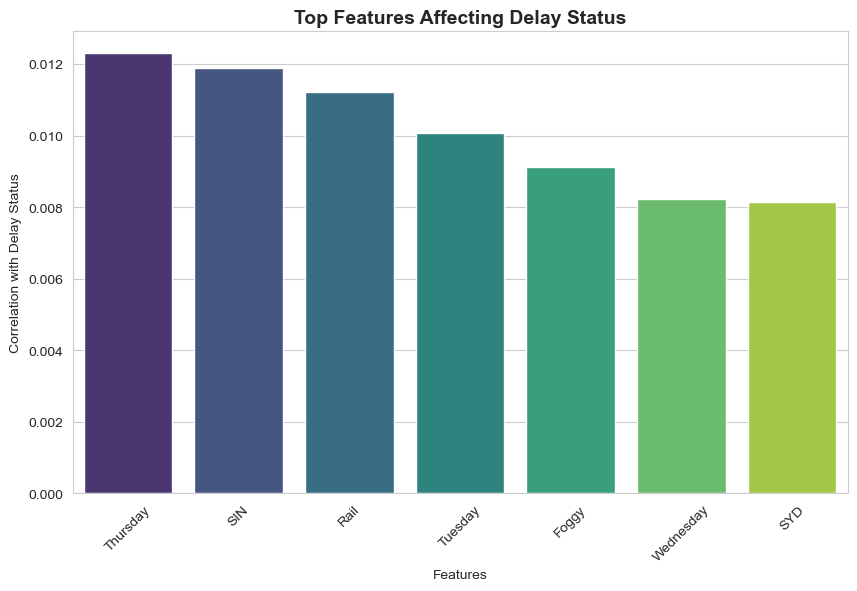

In [40]:
# Plot top correlated features
plt.figure(figsize=(10, 6))
sns.barplot(x=delay_correlation.index[1:8], y=delay_correlation.values[1:8], palette="viridis")
plt.title("Top Features Affecting Delay Status", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.ylabel("Correlation with Delay Status")
plt.xlabel("Features")
plt.show()

In [41]:
# Display important correlations
print("Top correlated features with Delay Status:")
print(delay_correlation.head(8))

Top correlated features with Delay Status:
On-Time      1.000000
Thursday     0.012296
SIN          0.011893
Rail         0.011218
Tuesday      0.010080
Foggy        0.009130
Wednesday    0.008217
SYD          0.008148
Name: On-Time, dtype: float64


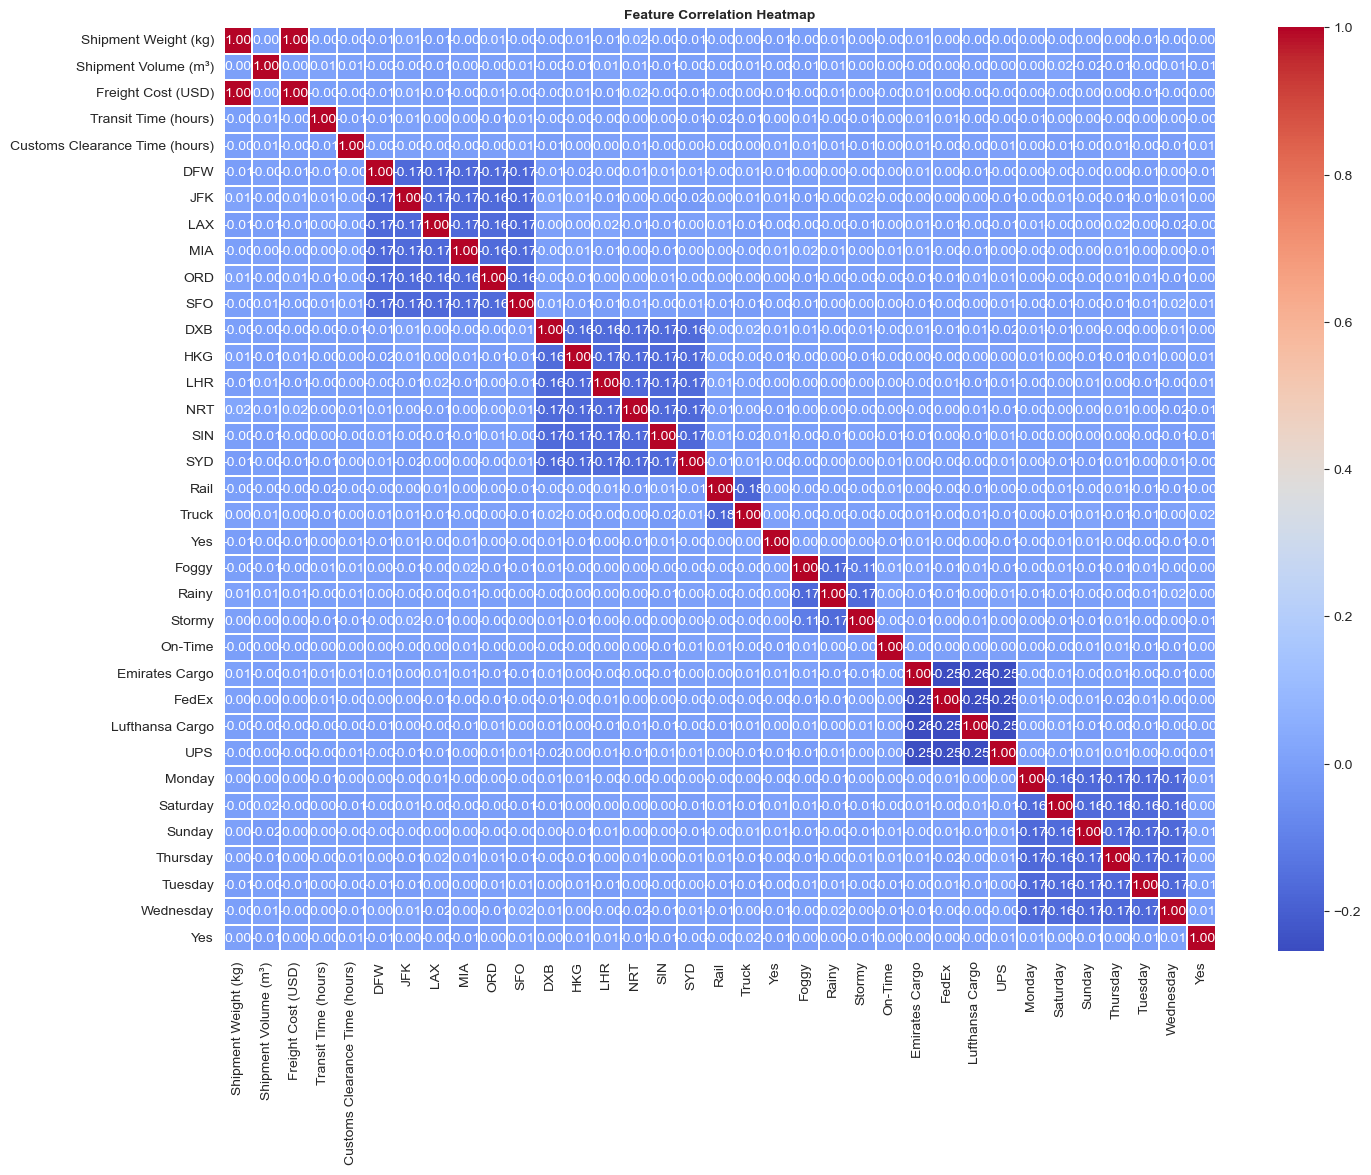

In [42]:
# Heatmap for correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.2)
plt.title("Feature Correlation Heatmap", fontsize=10, fontweight="bold")
plt.show()

In [43]:
table = table.drop(columns=['Yes'], errors='ignore')

In [44]:
x=table.drop("On-Time",axis=1)
y=table["On-Time"]

In [45]:
x

,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Transit Time (hours),Customs Clearance Time (hours),DFW,JFK,LAX,MIA,ORD,...,Emirates Cargo,FedEx,Lufthansa Cargo,UPS,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0.651558,0.154340,0.651556,0.166667,0.130435,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0.988515,0.747845,0.988516,0.242424,0.086957,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0.634062,0.209060,0.634061,0.015152,0.760870,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0.361079,0.152335,0.361082,0.181818,0.326087,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.667923,0.069954,0.667924,0.469697,0.043478,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.150482,0.217879,0.150485,0.469697,0.673913,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
19996,0.652275,0.858288,0.652278,0.621212,0.586957,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
19997,0.708904,0.590098,0.708905,0.378788,0.326087,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
19998,0.138411,0.085789,0.138413,0.166667,0.391304,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [46]:
y

0        0
1        1
2        1
3        1
4        0
        ..
19995    0
19996    1
19997    1
19998    1
19999    1
Name: On-Time, Length: 20000, dtype: int32

In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=15)

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Creating and training the logistic regression model
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
prediction=logmodel.predict(x_test)

In [107]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)

In [109]:
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.52


In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# Create and train the Decision Tree model
dc = DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=2,random_state=54)
dc.fit(x_train, y_train)

# Make predictions
y_pred = dc.predict(x_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("Classification report of Decision Tree Classifier Model")
print(classification_report(y_test, y_pred))

Accuracy: 0.53
Classification report of Decision Tree Classifier Model
              precision    recall  f1-score   support

           0       0.53      0.37      0.44      1478
           1       0.53      0.67      0.59      1522

    accuracy                           0.53      3000
   macro avg       0.53      0.52      0.51      3000
weighted avg       0.53      0.53      0.51      3000



In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    con = confusion_matrix(y_true, y_pred)  # Compute Confusion Matrix
    
    plt.figure(figsize=(7, 5), dpi=100)  # Adjusted size for better visualization

    # Heatmap with improved colors and formatting
    sns.heatmap(con, annot=True, fmt='d', cmap='magma', linewidths=1.5, 
                xticklabels=["On Time", "Delayed"], yticklabels=["On Time", "Delayed"], 
                cbar=True, annot_kws={"size": 14, "weight": "bold"})

    # Improved labels and title
    plt.xlabel("Predicted Label", fontsize=14, fontweight='bold', color='darkblue')
    plt.ylabel("True Label", fontsize=14, fontweight='bold', color='darkblue')
    plt.title(f"Confusion Matrix - {model_name} ", fontsize=16, fontweight='bold', color='navy', pad=15)

    # Display the plot
    plt.show()


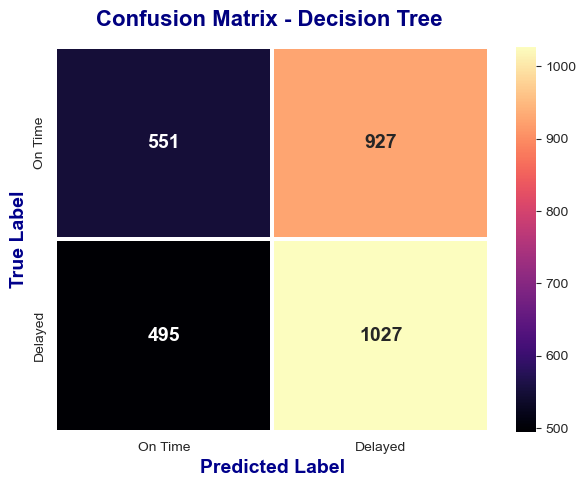

In [115]:
plot_confusion_matrix(y_test, y_pred, "Decision Tree")

In [117]:
from sklearn.ensemble import RandomForestClassifier

Accuracy: 0.51 

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.51      0.50      1478
           1       0.52      0.51      0.52      1522

    accuracy                           0.51      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.51      0.51      0.51      3000



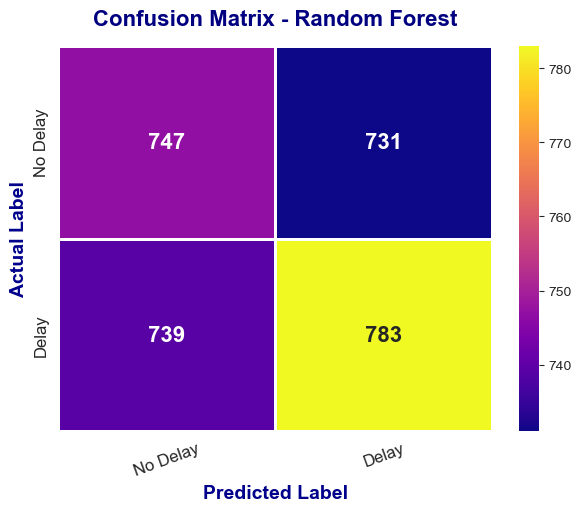

In [121]:
# Train the RandomForest model
model = RandomForestClassifier(n_estimators=15, random_state=1)
model.fit(x_train, y_train)

# Predictions
y_pred = model.predict(x_test)

# Accuracy & Classification Report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f} \n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Define labels
labels = ["No Delay", "Delay"]

# Create figure
plt.figure(figsize=(7, 5), dpi=100)

# Plot heatmap with new color scheme & improved aesthetics
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='plasma', linewidths=2, 
            xticklabels=labels, yticklabels=labels, cbar=True, annot_kws={"size": 16, "weight": "bold"})

# Customize axis labels and title
plt.xlabel("Predicted Label", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("Actual Label", fontsize=14, fontweight='bold', color='darkblue')
plt.title("Confusion Matrix - Random Forest", fontsize=16, fontweight='bold', color='navy', pad=15)

# Rotate x-axis labels slightly for better readability
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()

In [123]:
from sklearn.ensemble import AdaBoostClassifier
base_clf = DecisionTreeClassifier(max_depth=3)
ada_clf = AdaBoostClassifier(n_estimators=20, 
                             learning_rate=0.05, 
                             random_state=42)
ada_clf.fit(x_train, y_train)
y_pred = ada_clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Accuracy: {accuracy:.4f}")

C:\Users\Akshaya\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.5080


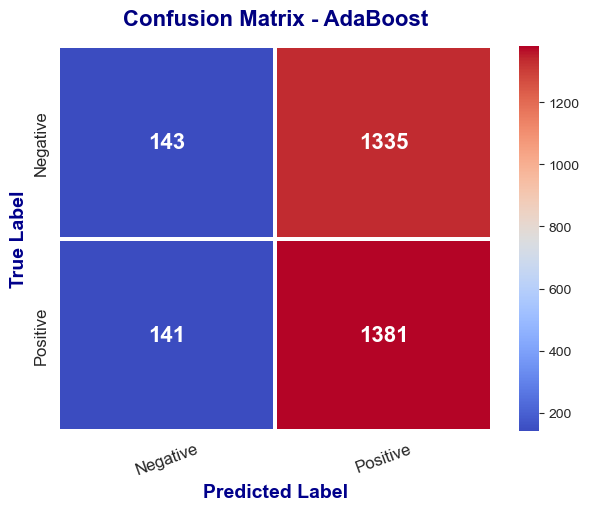

In [125]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
#Define labels
labels = ["Negative", "Positive"]

# Create the figure
plt.figure(figsize=(7, 5), dpi=100)

# Plot the confusion matrix with a visually appealing color map
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=1.5, 
            xticklabels=labels, yticklabels=labels, cbar=True, annot_kws={"size": 16, "weight": "bold"})

# Customize axis labels and title
plt.xlabel("Predicted Label", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("True Label", fontsize=14, fontweight='bold', color='darkblue')
plt.title("Confusion Matrix - AdaBoost", fontsize=16, fontweight='bold', color='navy', pad=15)

# Rotate x-axis labels slightly for better readability
plt.xticks(rotation=20, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

In [127]:
import xgboost as xgb
from xgboost import XGBClassifier
model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

C:\Users\Akshaya\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:08:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.50

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.46      0.47      1478
           1       0.51      0.55      0.53      1522

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000



C:\Users\Akshaya\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Akshaya\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:08:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Akshaya\AppData\Local\Temp\ipykernel_11920\758522295.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette=custom_palette, edgecolor="black", linewidth=1.5)


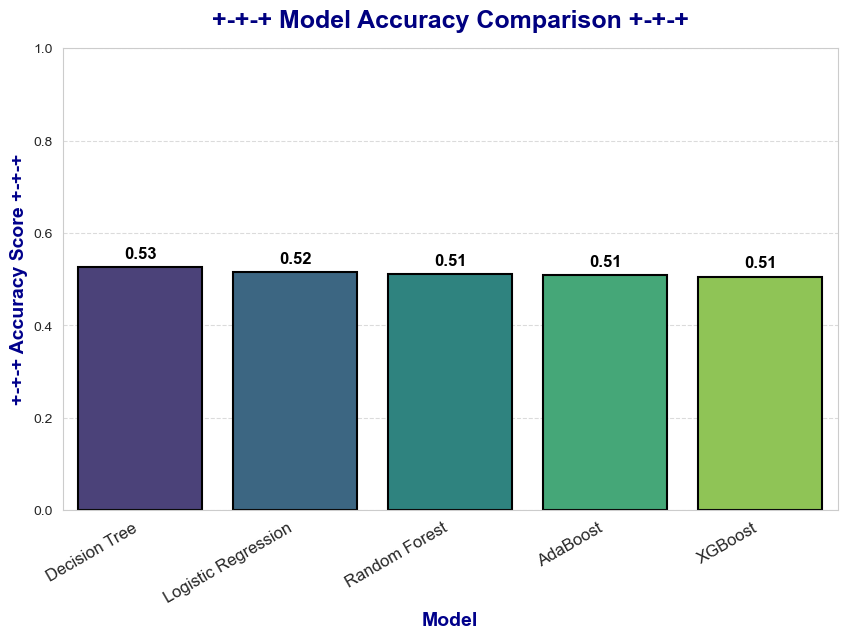

In [129]:
models = {
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=2, random_state=54),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=18, random_state=1),
    "AdaBoost": AdaBoostClassifier(n_estimators=20, learning_rate=0.05, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=104, learning_rate=0.4, max_depth=11, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
}
accuracy_results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy_results[name] = accuracy_score(y_test, y_pred)

# Convert to DataFrame
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Accuracy'])


# Define a visually appealing color palette
custom_palette = sns.color_palette("viridis", len(accuracy_df))

# Create a vertical bar chart with an improved color scheme
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette=custom_palette, edgecolor="black", linewidth=1.5)

# Add title and labels with enhanced styling
plt.xlabel("Model", fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel("+-+-+ Accuracy Score +-+-+", fontsize=14, fontweight='bold', color='darkblue')
plt.title("+-+-+ Model Accuracy Comparison +-+-+", fontsize=18, fontweight='bold', color='navy', pad=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, ha="right", fontsize=12)

# Set y-axis limits (accuracy is between 0 and 1)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show accuracy values on top of bars
for index, row in accuracy_df.iterrows():
    plt.text(index, row["Accuracy"] + 0.02, f"{row['Accuracy']:.2f}", ha="center", fontsize=12, fontweight="bold", color="black")

# Show the plot
plt.show()